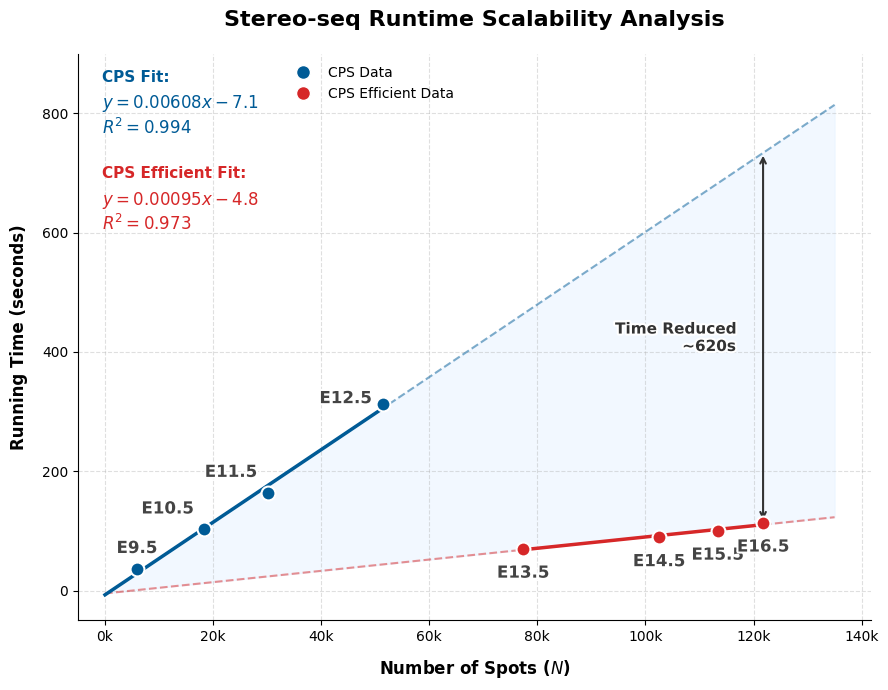

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.patheffects as pe
from matplotlib.ticker import FuncFormatter

# --- Data Preparation ---
data = [
    {'Stage': 'E9.5', 'Spots': 5913, 'Time': 36.3133, 'Method': 'CPS'},
    {'Stage': 'E10.5', 'Spots': 18408, 'Time': 102.5248, 'Method': 'CPS'},
    {'Stage': 'E11.5', 'Spots': 30124, 'Time': 163.8997, 'Method': 'CPS'},
    {'Stage': 'E12.5', 'Spots': 51365, 'Time': 312.6181, 'Method': 'CPS'},
    {'Stage': 'E13.5', 'Spots': 77369, 'Time': 70.1201, 'Method': 'CPS_Efficient'},
    {'Stage': 'E14.5', 'Spots': 102519, 'Time': 89.3597, 'Method': 'CPS_Efficient'},
    {'Stage': 'E15.5', 'Spots': 113350, 'Time': 100.3009, 'Method': 'CPS_Efficient'},
    {'Stage': 'E16.5', 'Spots': 121767, 'Time': 113.9054, 'Method': 'CPS_Efficient'},
]
df = pd.DataFrame(data)

# --- Fit Linear Models ---
cps_data = df[df['Method'] == 'CPS']
eff_data = df[df['Method'] == 'CPS_Efficient']

slope_cps, int_cps, r_cps, _, _ = stats.linregress(cps_data['Spots'], cps_data['Time'])
slope_eff, int_eff, r_eff, _, _ = stats.linregress(eff_data['Spots'], eff_data['Time'])

max_spots = 135000 
x_full = np.linspace(0, max_spots, 200)
y_cps_full = slope_cps * x_full + int_cps
y_eff_full = slope_eff * x_full + int_eff

# --- Plotting ---
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
fig, ax = plt.subplots(figsize=(9, 7))

colors = {'CPS': '#005b96', 'CPS_Efficient': '#d62728'}

# 1. Fill Area
ax.fill_between(x_full, y_cps_full, y_eff_full, where=(x_full > 0), 
                color='#e6f2ff', alpha=0.5)

# 2. Lines
ax.plot(x_full, y_cps_full, color=colors['CPS'], linestyle='--', linewidth=1.5, alpha=0.5)
ax.plot(x_full, y_eff_full, color=colors['CPS_Efficient'], linestyle='--', linewidth=1.5, alpha=0.5)

x_cps_range = np.linspace(0, cps_data['Spots'].max(), 100)
ax.plot(x_cps_range, slope_cps * x_cps_range + int_cps, color=colors['CPS'], linewidth=2.5)

x_eff_range = np.linspace(eff_data['Spots'].min(), eff_data['Spots'].max(), 100)
ax.plot(x_eff_range, slope_eff * x_eff_range + int_eff, color=colors['CPS_Efficient'], linewidth=2.5)

# 3. Scatter Points
ax.scatter(cps_data['Spots'], cps_data['Time'], color=colors['CPS'], s=100, edgecolors='white', linewidth=1.5, zorder=10)
ax.scatter(eff_data['Spots'], eff_data['Time'], color=colors['CPS_Efficient'], s=100, edgecolors='white', linewidth=1.5, zorder=10)

# --- Improved Labels (Outline Effect) ---
outline = [pe.withStroke(linewidth=3, foreground='white')]

label_adjustments = {
    'E9.5':  (0, 20, 'center', 'bottom'),
    'E10.5': (-2000, 20, 'right', 'bottom'),
    'E11.5': (-2000, 20, 'right', 'bottom'),
    'E12.5': (-2000, 10, 'right', 'center'),
    'E13.5': (0, -25, 'center', 'top'),
    'E14.5': (0, -25, 'center', 'top'),
    'E15.5': (0, -25, 'center', 'top'),
    'E16.5': (0, -25, 'center', 'top'),
}

for i, row in df.iterrows():
    stage = row['Stage']
    dx, dy, ha, va = label_adjustments.get(stage, (0, 0, 'center', 'center'))
    ax.text(row['Spots'] + dx, row['Time'] + dy, stage, 
            fontsize=12, fontweight='bold', color='#444444', 
            ha=ha, va=va, path_effects=outline, zorder=20)

# --- FIXED FORMULAS & POSITION ---
# Helper to format equation nicely: y = mx + c (standard decimal)
def format_eq(slope, intercept, r_sq):
    sign = "+" if intercept >= 0 else "-"
    # Use .5f for slope to show the small difference (0.006 vs 0.0008)
    # Use .1f for intercept
    return f"$y = {slope:.5f}x {sign} {abs(intercept):.1f}$\n$R^2 = {r_sq:.3f}$"

eq_cps_str = format_eq(slope_cps, int_cps, r_cps**2)
eq_eff_str = format_eq(slope_eff, int_eff, r_eff**2)

# Place them in the Top Left corner (using Axes coordinates 0-1)
# This guarantees they are neatly stacked and never overlap data
ax.text(0.03, 0.95, "CPS Fit:", transform=ax.transAxes, color=colors['CPS'], fontweight='bold', fontsize=11)
ax.text(0.03, 0.93, eq_cps_str, transform=ax.transAxes, color=colors['CPS'], fontsize=12, va='top')

ax.text(0.03, 0.78, "CPS Efficient Fit:", transform=ax.transAxes, color=colors['CPS_Efficient'], fontweight='bold', fontsize=11)
ax.text(0.03, 0.76, eq_eff_str, transform=ax.transAxes, color=colors['CPS_Efficient'], fontsize=12, va='top')


# --- Annotations ---
x_target = 121767
y_predicted_cps = slope_cps * x_target + int_cps
y_actual = 113.9
ax.annotate('', xy=(x_target, y_actual), xytext=(x_target, y_predicted_cps),
            arrowprops=dict(arrowstyle='<->', color='#333333', lw=1.5))
ax.text(x_target - 5000, (y_actual + y_predicted_cps)/2, 
        f'Time Reduced\n~{y_predicted_cps - y_actual:.0f}s', 
        ha='right', va='center', fontsize=11, fontweight='bold', color='#333333', path_effects=outline)

# --- Final Layout ---
ax.set_title('Stereo-seq Runtime Scalability Analysis', fontsize=16, fontweight='bold', loc='center', pad=20)
ax.set_xlabel('Number of Spots ($N$)', fontsize=12, weight='bold', labelpad=10)
ax.set_ylabel('Running Time (seconds)', fontsize=12, weight='bold', labelpad=10)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}k'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.4)
ax.set_ylim(-50, 900) # Give enough headroom
ax.set_xlim(-5000, max_spots * 1.05)

# Add simple legend for points only (since lines are explained by text)
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='CPS Data', markerfacecolor=colors['CPS'], markersize=10),
    Line2D([0], [0], marker='o', color='w', label='CPS Efficient Data', markerfacecolor=colors['CPS_Efficient'], markersize=10)
]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.25, 1.0), frameon=False)

plt.tight_layout()
plt.savefig('stereo_seq_runtime_formulas_fixed.png', dpi=300, bbox_inches='tight')